## 語単位のone-hotベクトル表現

In [1]:
import numpy as np
# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# First, build an index of all tokens in the data.
token_index = {}
for sample in samples:
    # We simply tokenize the samples via the `split` method.
    # in real life, we would also strip punctuation and special characters
    # from the samples.
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
            # Note that we don't attribute index 0 to anything.
# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10
# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in enumerate(sample.split()):
        index = token_index.get(word)
        results[i, j, index] = 1.

In [2]:
results

array([[[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,

In [3]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# We create a tokenizer, configured to only take
# into account the top-1000 most common on words
tokenizer = Tokenizer(num_words=1000)
# The builds the word index
tokenizer.fit_on_texts(samples)
# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)
# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [4]:
one_hot_results

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [5]:
sequences

[[1, 6, 9, 2, 1, 4], [1, 5, 3, 7, 8]]

## Word埋め込みベクトル（単語のIDをベクトル形式に変換）

In [6]:
from keras.layers import Embedding
# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 20  # cut texts after this number of words (among top max_features most common words)

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`
# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())
# Add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s - loss: 0.6561 - acc: 0.6479 - val_loss: 0.5909 - val_acc: 0.7146
Epoch 2/10
20000/20000 [==============================] - 1s - loss: 0.5193 - acc: 0.7591 - val_loss: 0.5121 - val_acc: 0.7366
Epoch 3/10
20000/20000 [==============================] - 1s - loss: 0.4516 - acc: 0.7929 - val_los

In [20]:
from  keras.layers import SimpleRNN
from keras.models import Sequential

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


In [21]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, nb_epoch=8, batch_size=128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 33s - loss: 0.6576 - acc: 0.6001 - val_loss: 0.7177 - val_acc: 0.5362
Epoch 2/8
20000/20000 [==============================] - 36s - loss: 0.4236 - acc: 0.8206 - val_loss: 0.4580 - val_acc: 0.7914
Epoch 3/8
20000/20000 [==============================] - 32s - loss: 0.2923 - acc: 0.8826 - val_loss: 0.3666 - val_acc: 0.8472
Epoch 4/8
20000/20000 [==============================] - 32s - loss: 0.2055 - acc: 0.9227 - val_loss: 0.4738 - val_acc: 0.7870
Epoch 5/8
20000/20000 [==============================] - 32s - loss: 0.1464 - acc: 0.9477 - val_loss: 0.4484 - val_acc: 0.8308
Epoch 6/8
20000/20000 [==============================] - 32s - loss: 0.0942 - acc: 0.9684 - val_loss: 1.7280 - val_acc: 0.5814
Epoch 7/8
20000/20000 [==============================] - 32s - loss: 0.0807 - acc: 0.9742 - val_loss: 0.6480 - val_acc: 0.7598
Epoch 8/8
20000/20000 [==============================] - 33s -

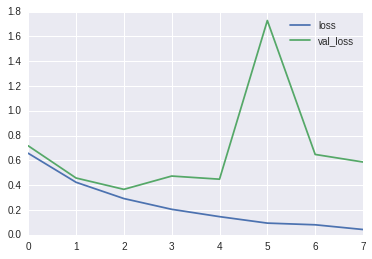

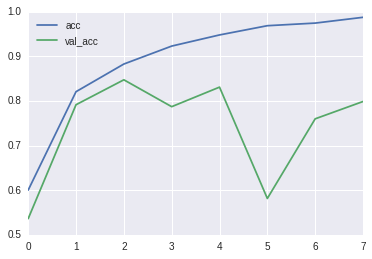

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn

%matplotlib inline

history_dict = history.history

# history_dictをpandasnのデータフレームに変換
d = pd.DataFrame(history_dict)
# loss, val_lossをプロット
d[['loss', 'val_loss']].plot()
plt.show()

d[['acc', 'val_acc']].plot()
plt.show()

In [24]:
from  keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, nb_epoch=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 181s - loss: 0.5529 - acc: 0.7366 - val_loss: 0.3917 - val_acc: 0.8424
Epoch 2/10
20000/20000 [==============================] - 178s - loss: 0.3070 - acc: 0.8762 - val_loss: 0.3548 - val_acc: 0.8478
Epoch 3/10
20000/20000 [==============================] - 186s - loss: 0.2414 - acc: 0.9083 - val_loss: 0.3468 - val_acc: 0.8466
Epoch 4/10
20000/20000 [==============================] - 194s - loss: 0.2050 - acc: 0.9249 - val_loss: 0.3181 - val_acc: 0.8852
Epoch 5/10
20000/20000 [==============================] - 196s - loss: 0.1837 - acc: 0.9330 - val_loss: 0.2947 - val_acc: 0.8820
Epoch 6/10
20000/20000 [==============================] - 165s - loss: 0.1626 - acc: 0.9411 - val_loss: 0.3284 - val_acc: 0.8526
Epoch 7/10
20000/20000 [==============================] - 171s - loss: 0.1506 - acc: 0.9479 - val_loss: 0.3142 - val_acc: 0.8808
Epoch 8/10
20000/20000 [========================

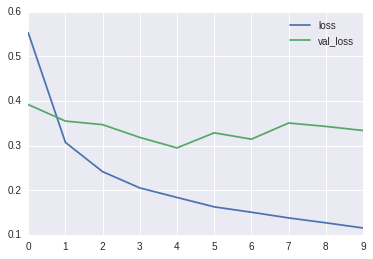

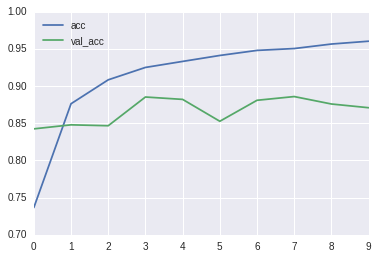

In [25]:
history_dict = history.history

# history_dictをpandasnのデータフレームに変換
d = pd.DataFrame(history_dict)
# loss, val_lossをプロット
d[['loss', 'val_loss']].plot()
plt.show()

d[['acc', 'val_acc']].plot()
plt.show()

In [14]:
%%bash
cd Downloads
mkdir jena_climate
cd jena_climate
wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


--2017-07-15 07:41:46--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.228.83
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.228.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: 'jena_climate_2009_2016.csv.zip'

     0K .......... .......... .......... .......... ..........  0% 72.7K 3m1s
    50K .......... .......... .......... .......... ..........  0%  244K 1m57s
   100K .......... .......... .......... .......... ..........  1%  256K 95s
   150K .......... .......... .......... .......... ..........  1%  356K 80s
   200K .......... .......... .......... .......... ..........  1%  567K 68s
   250K .......... .......... .......... .......... ..........  2%  479K 61s
   300K .......... .......... .......... .......... ..........  2%  544K 56s
   350K .......... .......... .......... .......... ..........  3% 3.99M 49s
   400

In [1]:
import os
data_dir = 'Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [2]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

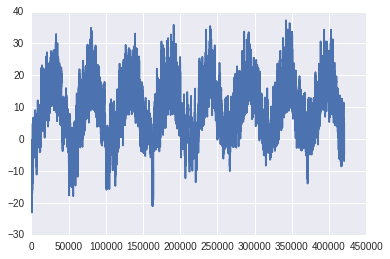

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

temp = float_data[:, 1]  # temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

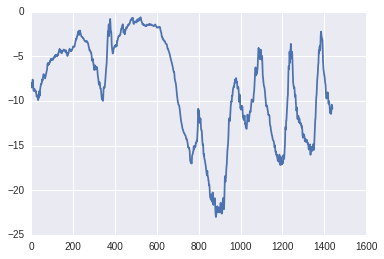

In [4]:
plt.plot(range(1440), temp[:1440])

データの正規化

In [5]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [6]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

データは10分間隔で測定された温度データ
- loopback = 720 : ５日分のデータ
- steps = 6 : １時間の６データ数
- delay = 144 : ２４時間後の温度を予測

In [14]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=0, max_index=200000, shuffle=True, step=step,
batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=300001, max_index=None, step=step, batch_size=batch_size)
# This is how many steps to draw from `val_gen` in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size
# This is how many steps to draw from `test_gen` in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [15]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

0.289735972991


In [16]:
celsius_mae = 0.29 * std[1]

In [17]:
celsius_mae

2.5672247338393395

単純なニューラルネットモデルで、どの程度予測できるか見てみる。

以下の結果は図6.18とは大きく異なる結果となっている。

In [18]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s - loss: 1.8228 - val_loss: 1.1467
Epoch 2/20
500/500 [==============================] - 13s - loss: 1.4039 - val_loss: 2.0780
Epoch 3/20
500/500 [==============================] - 13s - loss: 3.1643 - val_loss: 4.6592
Epoch 4/20
500/500 [==============================] - 12s - loss: 6.5291 - val_loss: 5.9072
Epoch 5/20
500/500 [==============================] - 12s - loss: 10.6773 - val_loss: 15.8527
Epoch 6/20
500/500 [==============================] - 11s - loss: 15.3495 - val_loss: 18.8217
Epoch 7/20
500/500 [==============================] - 11s - loss: 20.0555 - val_loss: 29.2959
Epoch 8/20
500/500 [==============================] - 12s - loss: 24.8096 - val_loss: 19.2993
Epoch 9/20
500/500 [==============================] - 12s - loss: 29.8820 - val_loss: 26.0697
Epoch 10/20
500/500 [==============================] - 12s - loss: 34.9356 - val_loss: 30.9325
Epoch 11/20
500/500 [==============================] - 12s - loss: 

In [8]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    dict = {'loss':loss,  'val_loss': val_loss}
    d = pd.DataFrame(dict)

    d.plot()
    plt.title('Training and validation loss')
    plt.show()

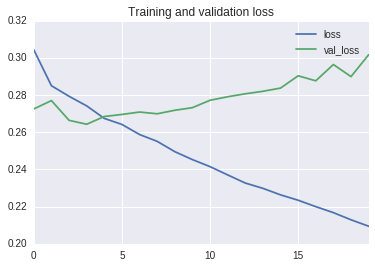

In [24]:
plot_history(history)

リカレントモデルで解く

In [23]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 267s - loss: 0.3043 - val_loss: 0.2725
Epoch 2/20
500/500 [==============================] - 272s - loss: 0.2850 - val_loss: 0.2770
Epoch 3/20
500/500 [==============================] - 286s - loss: 0.2793 - val_loss: 0.2664
Epoch 4/20
500/500 [==============================] - 267s - loss: 0.2741 - val_loss: 0.2643
Epoch 5/20
500/500 [==============================] - 263s - loss: 0.2674 - val_loss: 0.2684
Epoch 6/20
500/500 [==============================] - 263s - loss: 0.2642 - val_loss: 0.2695
Epoch 7/20
500/500 [==============================] - 264s - loss: 0.2587 - val_loss: 0.2708
Epoch 8/20
500/500 [==============================] - 263s - loss: 0.2551 - val_loss: 0.2699
Epoch 9/20
500/500 [==============================] - 261s - loss: 0.2495 - val_loss: 0.2718
Epoch 10/20
500/500 [==============================] - 262s - loss: 0.2453 - val_loss: 0.2732
Epoch 11/20
500/500 [==============================] - 257s - loss: 0

オーバーフィッティングの兆候として、トレーニングのlossは減少を続けているが、
val_lossは、最初の数エポックで最小となり、その後val_lossはだんだんと増加する傾向が見られる。

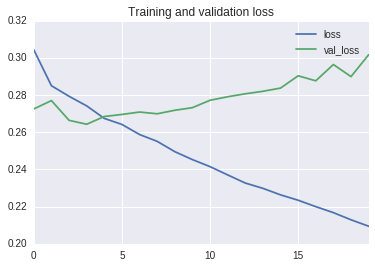

In [25]:
plot_history(history)

In [26]:
# epochsは20にした
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history_dp = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 285s - loss: 0.3406 - val_loss: 0.2766
Epoch 2/20
500/500 [==============================] - 291s - loss: 0.3130 - val_loss: 0.2770
Epoch 3/20
500/500 [==============================] - 289s - loss: 0.3068 - val_loss: 0.2689
Epoch 4/20
500/500 [==============================] - 297s - loss: 0.3054 - val_loss: 0.2718
Epoch 5/20
500/500 [==============================] - 286s - loss: 0.3010 - val_loss: 0.2674
Epoch 6/20
500/500 [==============================] - 305s - loss: 0.2957 - val_loss: 0.2661
Epoch 7/20
500/500 [==============================] - 284s - loss: 0.2933 - val_loss: 0.2697
Epoch 8/20
500/500 [==============================] - 282s - loss: 0.2934 - val_loss: 0.2651
Epoch 9/20
500/500 [==============================] - 287s - loss: 0.2912 - val_loss: 0.2669
Epoch 10/20
500/500 [==============================] - 289s - loss: 0.2904 - val_loss: 0.2682
Epoch 11/20
500/500 [==============================] - 290s - loss: 0

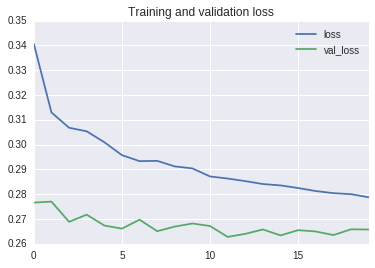

In [29]:
plot_history(history_dp)

### リカレント層のスタッキング

kerasでリカレント層をスタックする場合、すべての内部状態を返す必要がある。このため、return_sequences=Trueオプションを指定する。

In [30]:
# epochsは20にした
# １層の場合との比較のため、dropout=0.2, recurrent_dropout=0.2に変更
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.2,
                     recurrent_dropout=0.2))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history_stacked_dp = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 874s - loss: 0.3460 - val_loss: 0.2941
Epoch 2/20
500/500 [==============================] - 837s - loss: 0.3232 - val_loss: 0.2780
Epoch 3/20
500/500 [==============================] - 2138s - loss: 0.3144 - val_loss: 0.2765
Epoch 4/20
500/500 [==============================] - 847s - loss: 0.3107 - val_loss: 0.2841
Epoch 5/20
500/500 [==============================] - 815s - loss: 0.3040 - val_loss: 0.2700
Epoch 6/20
500/500 [==============================] - 809s - loss: 0.3001 - val_loss: 0.2799
Epoch 7/20
500/500 [==============================] - 813s - loss: 0.2958 - val_loss: 0.2796
Epoch 8/20
500/500 [==============================] - 819s - loss: 0.2918 - val_loss: 0.2779
Epoch 9/20
500/500 [==============================] - 811s - loss: 0.2906 - val_loss: 0.2711
Epoch 10/20
500/500 [==============================] - 910s - loss: 0.2867 - val_loss: 0.2899
Epoch 11/20
500/500 [==============================] - 900s - loss: 

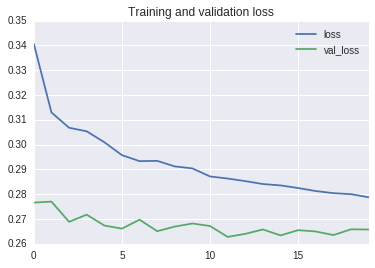

In [31]:
plot_history(history_dp)

### bi-derectional RNN
以下のコードはエラーとなった！

In [56]:
model = Sequential()
model.add(layers.Bidirectional(
        layers.GRU(32, input_shape=(None, float_data.shape[-1]))))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history_dp = model.fit_generator(train_gen_rev,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_rev,
                              validation_steps=val_steps)

ValueError: The first layer in a Sequential model must get an `input_shape` or `batch_input_shape` argument.

## 1D CNNとRNNの連携


In [7]:
# We reuse the `generator` function defined at the previous section.
# This was previously set to 6 (one point per hour).
# Now 3 (one point per 30 min).
step = 3
lookback = 720  # Unchanged
delay = 144 # Unchanged
train_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=0, max_index=200000, shuffle=True, step=step)
val_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=200001, max_index=300000, step=step)
test_gen = generator(float_data, lookback=lookback, delay=delay,
    min_index=300001, max_index=None, step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 165s - loss: 0.3441 - val_loss: 0.2901
Epoch 2/20
500/500 [=========================

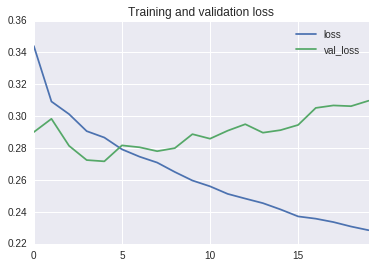

In [11]:
plot_history(history)